# Importing Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

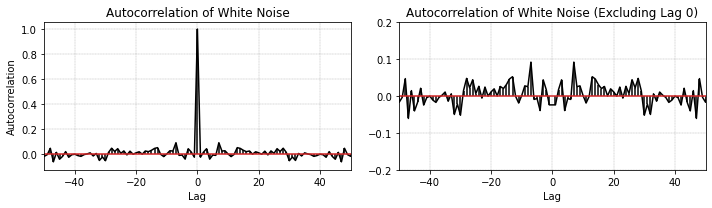

In [23]:
# Generating white noise
np.random.seed(0)  # Seed for reproducibility
white_noise = np.random.normal(0, 1, 1000)  # Mean 0, standard deviation 1, 1000 samples

# Computing autocorrelation using NumPy's correlate function
autocorr = np.correlate(white_noise, white_noise, mode='full')
autocorr_normalized = autocorr / autocorr.max()  # Normalize to peak at 1
lags = np.arange(-len(white_noise) + 1, len(white_noise))

# Creating a 1x2 subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

# Plotting the full autocorrelation function on the first subplot
ax1.stem(lags, autocorr_normalized, use_line_collection=True, linefmt='black', markerfmt='black')
ax1.set_xlim(-50, 50)
ax1.set_title('Autocorrelation of White Noise')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Autocorrelation')
ax1.grid(True, linestyle='--', linewidth=0.3, color='gray')

# Exclude the peak at lag 0 for the second subplot
non_zero_lags = lags != 0
autocorr_no_peak = autocorr_normalized[non_zero_lags]
lags_no_peak = lags[non_zero_lags]

# Plotting the autocorrelation function excluding lag 0 on the second subplot
ax2.stem(lags_no_peak, autocorr_no_peak, use_line_collection=True, linefmt='black', markerfmt='black')
ax2.set_xlim(-50, 50)
ax2.set_ylim(-0.2, 0.2)
ax2.set_title('Autocorrelation of White Noise (Excluding Lag 0)')
ax2.set_xlabel('Lag')
ax2.grid(True, linestyle='--', linewidth=0.3, color='gray')

plt.tight_layout()

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/AutoCorr/AutoCorr_PRNG.png')

plt.show()


In [ ]:
# Generating pink noise
def pink_noise(N):
    """ Generate pink noise. """
    uneven = N % 2
    X = np.random.randn(N // 2 + 1 + uneven) + 1j * np.random.randn(N // 2 + 1 + uneven)
    S = np.arange(len(X)) + 1  # +1 to avoid division by zero at the first element
    y = np.fft.irfft(X / np.sqrt(S), n=N, norm='ortho')
    return y[:N]

# Number of points
N = 1024
pink_noise_signal = pink_noise(N)

# Compute autocorrelation using the FFT method
autocorr = correlate(pink_noise_signal, pink_noise_signal, mode='full')
autocorr /= max(autocorr)  # Normalize
lags = correlation_lags(len(pink_noise_signal), len(pink_noise_signal), mode='full')

# Plotting the autocorrelation
plt.figure(figsize=(10, 5))
plt.plot(lags, autocorr)
plt.title('Autocorrelation of Pink Noise')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


# 1. Autocorrelation of BJT

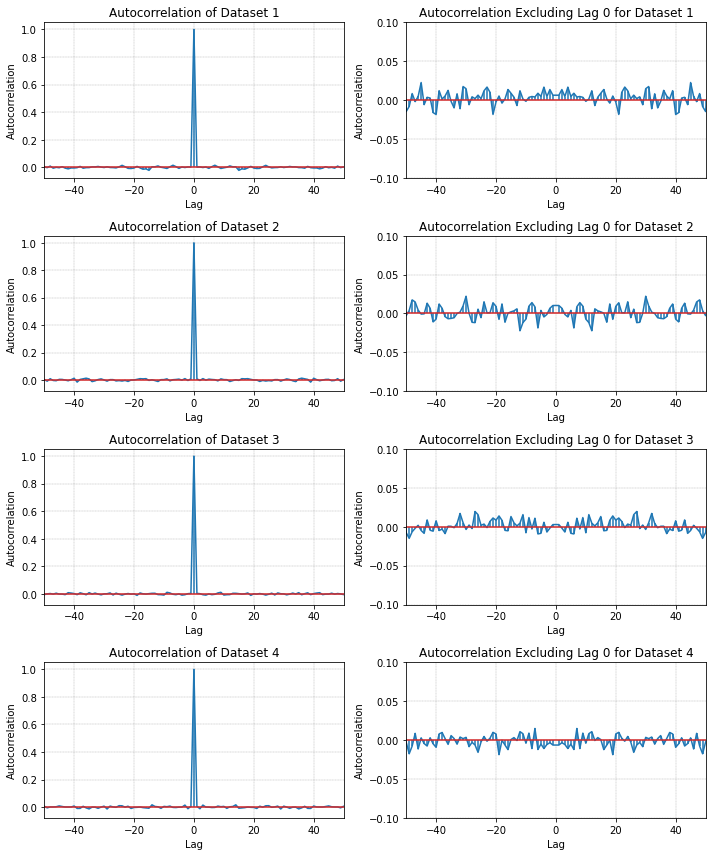

In [9]:
# Set up the figure and axes for a 4x2 grid of plots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
datasets = ['1.csv', '2.csv', '3.csv', '4.csv']  

for i, dataset in enumerate(datasets):
    # Load data
    data_path = f"/Users/goldenswan/Desktop/Thesis/Data/B1_100kHz_lowpassfilter/{dataset}"
    data = pd.read_csv(data_path, delimiter=';')
    data = data.rename(columns={'# TIME (us)': 'Time', 'CH1 (V)': 'Value'})
    
    # Sampling the data
    sample_rate = 500  # For the first row
    data_sampled = data.iloc[::sample_rate]
    white_noise = data_sampled['Value']

    # Computing autocorrelation
    autocorr = np.correlate(white_noise, white_noise, mode='full')
    autocorr_normalized = autocorr / autocorr.max()
    lags = np.arange(-len(white_noise) + 1, len(white_noise))

    # Plotting the autocorrelation function including lag 0
    axes[i, 0].stem(lags, autocorr_normalized, use_line_collection=True, linefmt='tab:blue', markerfmt='tab:blue')
    axes[i, 0].set_xlim(-50, 50)
    axes[i, 0].set_title(f'Autocorrelation of Dataset {i+1}')
    axes[i, 0].set_xlabel('Lag')
    axes[i, 0].set_ylabel('Autocorrelation')
    axes[i, 0].grid(True, linestyle='--', linewidth=0.3, color='gray')

    # Now for the second column, excluding lag 0
    sample_rate = 1000  # For the second row
    data_sampled = data.iloc[::sample_rate]
    white_noise = data_sampled['Value']

    # Recompute autocorrelation for the second plot
    autocorr = np.correlate(white_noise, white_noise, mode='full')
    autocorr_normalized = autocorr / autocorr.max()
    lags = np.arange(-len(white_noise) + 1, len(white_noise))

    # Exclude the peak at lag 0 for visualization purposes
    non_zero_lags = lags != 0
    autocorr_no_peak = autocorr_normalized[non_zero_lags]
    lags_no_peak = lags[non_zero_lags]

    # Plotting the autocorrelation function excluding lag 0
    axes[i, 1].stem(lags_no_peak, autocorr_no_peak, use_line_collection=True, linefmt='tab:blue', markerfmt='tab:blue')
    axes[i, 1].set_xlim(-50, 50)
    axes[i, 1].set_ylim(-0.1, 0.1)
    axes[i, 1].set_title(f'Autocorrelation Excluding Lag 0 for Dataset {i+1}')
    axes[i, 1].set_xlabel('Lag')
    axes[i, 1].set_ylabel('Autocorrelation')
    axes[i, 1].grid(True, linestyle='--', linewidth=0.3, color='gray')

plt.tight_layout()

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/AutoCorr/AutoCorr_BJT_LP.png')

plt.show()


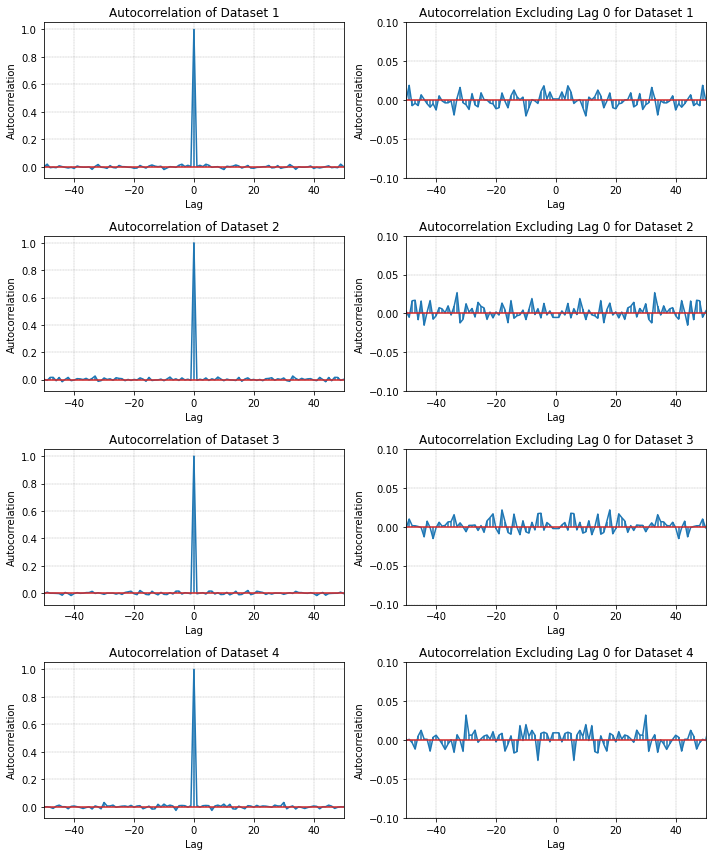

In [10]:
# Set up the figure and axes for a 4x2 grid of plots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
datasets = ['1.csv', '2.csv', '3.csv', '4.csv']

for i, dataset in enumerate(datasets):
    # Load data
    data_path = f"/Users/goldenswan/Desktop/Thesis/Data/B1_no_lowpassfilter/{dataset}"
    data = pd.read_csv(data_path, delimiter=';')
    data = data.rename(columns={'# TIME (us)': 'Time', 'CH1 (V)': 'Value'})
    
    # Sampling the data
    sample_rate = 1000  # For the first row
    data_sampled = data.iloc[::sample_rate]
    white_noise = data_sampled['Value']

    # Computing autocorrelation
    autocorr = np.correlate(white_noise, white_noise, mode='full')
    autocorr_normalized = autocorr / autocorr.max()
    lags = np.arange(-len(white_noise) + 1, len(white_noise))

    # Plotting the autocorrelation function including lag 0
    axes[i, 0].stem(lags, autocorr_normalized, use_line_collection=True, linefmt='tab:blue', markerfmt='tab:blue')
    axes[i, 0].set_xlim(-50, 50)
    axes[i, 0].set_title(f'Autocorrelation of Dataset {i+1}')
    axes[i, 0].set_xlabel('Lag')
    axes[i, 0].set_ylabel('Autocorrelation')
    axes[i, 0].grid(True, linestyle='--', linewidth=0.3, color='gray')

    # Now for the second column, excluding lag 0
    sample_rate = 1000  # For the second row
    data_sampled = data.iloc[::sample_rate]
    white_noise = data_sampled['Value']

    # Recompute autocorrelation for the second plot
    autocorr = np.correlate(white_noise, white_noise, mode='full')
    autocorr_normalized = autocorr / autocorr.max()
    lags = np.arange(-len(white_noise) + 1, len(white_noise))

    # Exclude the peak at lag 0 for visualization purposes
    non_zero_lags = lags != 0
    autocorr_no_peak = autocorr_normalized[non_zero_lags]
    lags_no_peak = lags[non_zero_lags]

    # Plotting the autocorrelation function excluding lag 0
    axes[i, 1].stem(lags_no_peak, autocorr_no_peak, use_line_collection=True, linefmt='tab:blue', markerfmt='tab:blue')
    axes[i, 1].set_xlim(-50, 50)
    axes[i, 1].set_ylim(-0.1, 0.1)
    axes[i, 1].set_title(f'Autocorrelation Excluding Lag 0 for Dataset {i+1}')
    axes[i, 1].set_xlabel('Lag')
    axes[i, 1].set_ylabel('Autocorrelation')
    axes[i, 1].grid(True, linestyle='--', linewidth=0.3, color='gray')

plt.tight_layout()

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/AutoCorr/AutoCorr_BJT_no_LP.png')

plt.show()


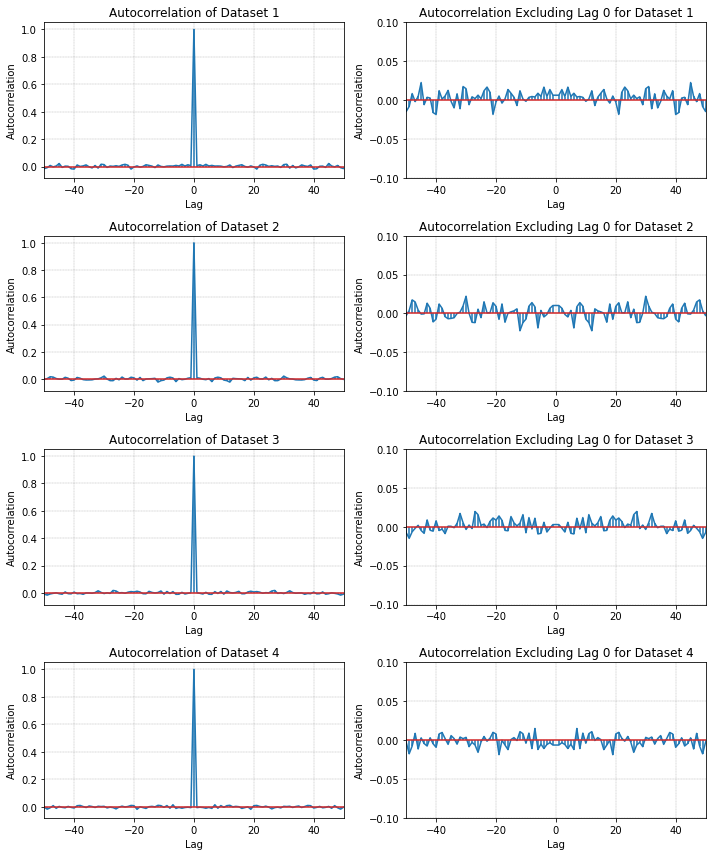

In [11]:
# Set up the figure and axes for a 4x2 grid of plots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
datasets = ['1.csv', '2.csv', '3.csv', '4.csv']  # Replace with actual filenames

for i, dataset in enumerate(datasets):
    # Load data
    data_path = f"/Users/goldenswan/Desktop/Thesis/Data/B2_lowpass/{dataset}"
    data = pd.read_csv(data_path, delimiter=';')
    data = data.rename(columns={'# TIME (us)': 'Time', 'CH1 (V)': 'Value'})
    
    # Sampling the data
    sample_rate = 1000  # For the first row
    data_sampled = data.iloc[::sample_rate]
    white_noise = data_sampled['Value']

    # Computing autocorrelation
    autocorr = np.correlate(white_noise, white_noise, mode='full')
    autocorr_normalized = autocorr / autocorr.max()
    lags = np.arange(-len(white_noise) + 1, len(white_noise))

    # Plotting the autocorrelation function including lag 0
    axes[i, 0].stem(lags, autocorr_normalized, use_line_collection=True, linefmt='tab:blue', markerfmt='tab:blue')
    axes[i, 0].set_xlim(-50, 50)
    axes[i, 0].set_title(f'Autocorrelation of Dataset {i+1}')
    axes[i, 0].set_xlabel('Lag')
    axes[i, 0].set_ylabel('Autocorrelation')
    axes[i, 0].grid(True, linestyle='--', linewidth=0.3, color='gray')

    # Now for the second column, excluding lag 0
    sample_rate = 1000  # For the second row
    data_sampled = data.iloc[::sample_rate]
    white_noise = data_sampled['Value']

    # Recompute autocorrelation for the second plot
    autocorr = np.correlate(white_noise, white_noise, mode='full')
    autocorr_normalized = autocorr / autocorr.max()
    lags = np.arange(-len(white_noise) + 1, len(white_noise))

    # Exclude the peak at lag 0 for visualization purposes
    non_zero_lags = lags != 0
    autocorr_no_peak = autocorr_normalized[non_zero_lags]
    lags_no_peak = lags[non_zero_lags]

    # Plotting the autocorrelation function excluding lag 0
    axes[i, 1].stem(lags_no_peak, autocorr_no_peak, use_line_collection=True, linefmt='tab:blue', markerfmt='tab:blue')
    axes[i, 1].set_xlim(-50, 50)
    axes[i, 1].set_ylim(-0.1, 0.1)
    axes[i, 1].set_title(f'Autocorrelation Excluding Lag 0 for Dataset {i+1}')
    axes[i, 1].set_xlabel('Lag')
    axes[i, 1].set_ylabel('Autocorrelation')
    axes[i, 1].grid(True, linestyle='--', linewidth=0.3, color='gray')

plt.tight_layout()

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/AutoCorr/AutoCorr_BJT2_LP.png')

plt.show()


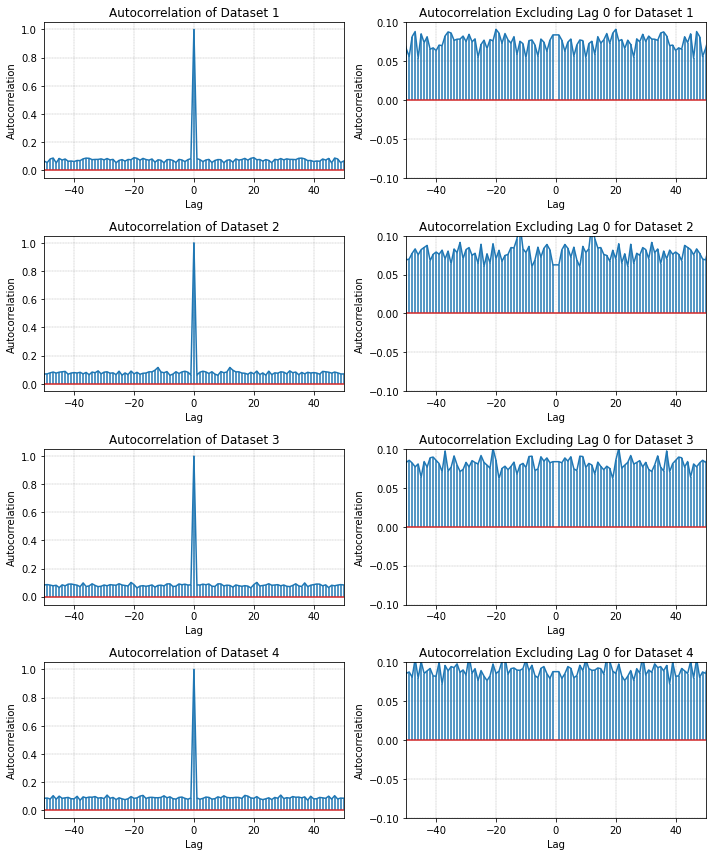

In [12]:
# Set up the figure and axes for a 4x2 grid of plots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
datasets = ['1.csv', '2.csv', '3.csv', '4.csv']  # Replace with actual filenames

for i, dataset in enumerate(datasets):
    # Load data
    data_path = f"/Users/goldenswan/Desktop/Thesis/Data/B2_no_lowpass/{dataset}"
    data = pd.read_csv(data_path, delimiter=';')
    data = data.rename(columns={'# TIME (us)': 'Time', 'CH1 (V)': 'Value'})
    
    # Sampling the data
    sample_rate = 1000  # For the first row
    data_sampled = data.iloc[::sample_rate]
    white_noise = data_sampled['Value']

    # Computing autocorrelation
    autocorr = np.correlate(white_noise, white_noise, mode='full')
    autocorr_normalized = autocorr / autocorr.max()
    lags = np.arange(-len(white_noise) + 1, len(white_noise))

    # Plotting the autocorrelation function including lag 0
    axes[i, 0].stem(lags, autocorr_normalized, use_line_collection=True, linefmt='tab:blue', markerfmt='tab:blue')
    axes[i, 0].set_xlim(-50, 50)
    axes[i, 0].set_title(f'Autocorrelation of Dataset {i+1}')
    axes[i, 0].set_xlabel('Lag')
    axes[i, 0].set_ylabel('Autocorrelation')
    axes[i, 0].grid(True, linestyle='--', linewidth=0.3, color='gray')

    # Now for the second column, excluding lag 0
    sample_rate = 1000  # For the second row
    data_sampled = data.iloc[::sample_rate]
    white_noise = data_sampled['Value']

    # Recompute autocorrelation for the second plot
    autocorr = np.correlate(white_noise, white_noise, mode='full')
    autocorr_normalized = autocorr / autocorr.max()
    lags = np.arange(-len(white_noise) + 1, len(white_noise))

    # Exclude the peak at lag 0 for visualization purposes
    non_zero_lags = lags != 0
    autocorr_no_peak = autocorr_normalized[non_zero_lags]
    lags_no_peak = lags[non_zero_lags]

    # Plotting the autocorrelation function excluding lag 0
    axes[i, 1].stem(lags_no_peak, autocorr_no_peak, use_line_collection=True, linefmt='tab:blue', markerfmt='tab:blue')
    axes[i, 1].set_xlim(-50, 50)
    axes[i, 1].set_ylim(-0.1, 0.1)
    axes[i, 1].set_title(f'Autocorrelation Excluding Lag 0 for Dataset {i+1}')
    axes[i, 1].set_xlabel('Lag')
    axes[i, 1].set_ylabel('Autocorrelation')
    axes[i, 1].grid(True, linestyle='--', linewidth=0.3, color='gray')

plt.tight_layout()

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/AutoCorr/AutoCorr_BJT2_no_LP.png')

plt.show()


# 2. Autocorrelation of HP 3722-A

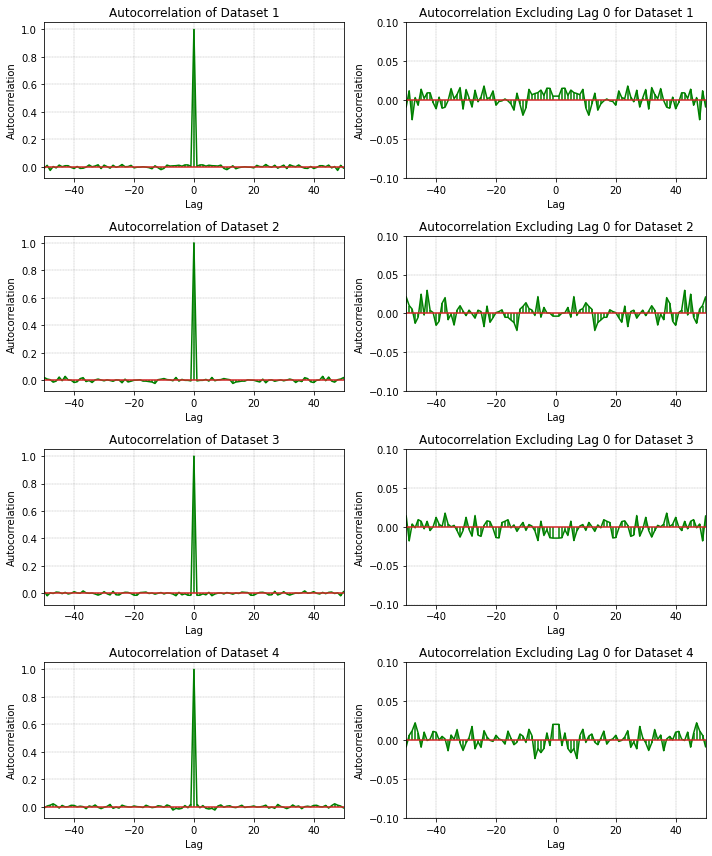

In [13]:
# Set up the figure and axes for a 4x2 grid of plots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
datasets = ['noise_50kHz_1.csv', 'noise_50kHz_2.csv', 'noise_50kHz_3.csv', 'noise_50kHz_4.csv']  # Replace with actual filenames

for i, dataset in enumerate(datasets):
    # Load data
    data_path = f"/Users/goldenswan/Desktop/Thesis/Data/HP/{dataset}"
    data = pd.read_csv(data_path, delimiter=';')
    data = data.rename(columns={'# TIME (us)': 'Time', 'CH1 (V)': 'Value'})
    
    # Sampling the data
    sample_rate = 1000  # For the first row
    data_sampled = data.iloc[::sample_rate]
    white_noise = data_sampled['Value']

    # Computing autocorrelation
    autocorr = np.correlate(white_noise, white_noise, mode='full')
    autocorr_normalized = autocorr / autocorr.max()
    lags = np.arange(-len(white_noise) + 1, len(white_noise))

    # Plotting the autocorrelation function including lag 0
    axes[i, 0].stem(lags, autocorr_normalized, use_line_collection=True, linefmt='green', markerfmt='green')
    axes[i, 0].set_xlim(-50, 50)
    axes[i, 0].set_title(f'Autocorrelation of Dataset {i+1}')
    axes[i, 0].set_xlabel('Lag')
    axes[i, 0].set_ylabel('Autocorrelation')
    axes[i, 0].grid(True, linestyle='--', linewidth=0.3, color='gray')

    # Now for the second column, excluding lag 0
    sample_rate = 1000  # For the second row
    data_sampled = data.iloc[::sample_rate]
    white_noise = data_sampled['Value']

    # Recompute autocorrelation for the second plot
    autocorr = np.correlate(white_noise, white_noise, mode='full')
    autocorr_normalized = autocorr / autocorr.max()
    lags = np.arange(-len(white_noise) + 1, len(white_noise))

    # Exclude the peak at lag 0 for visualization purposes
    non_zero_lags = lags != 0
    autocorr_no_peak = autocorr_normalized[non_zero_lags]
    lags_no_peak = lags[non_zero_lags]

    # Plotting the autocorrelation function excluding lag 0
    axes[i, 1].stem(lags_no_peak, autocorr_no_peak, use_line_collection=True, linefmt='green', markerfmt='green')
    axes[i, 1].set_xlim(-50, 50)
    axes[i, 1].set_ylim(-0.1, 0.1)
    axes[i, 1].set_title(f'Autocorrelation Excluding Lag 0 for Dataset {i+1}')
    axes[i, 1].set_xlabel('Lag')
    axes[i, 1].set_ylabel('Autocorrelation')
    axes[i, 1].grid(True, linestyle='--', linewidth=0.3, color='gray')

plt.tight_layout()

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/AutoCorr/AutoCorr_HP_50kHz.png')

plt.show()


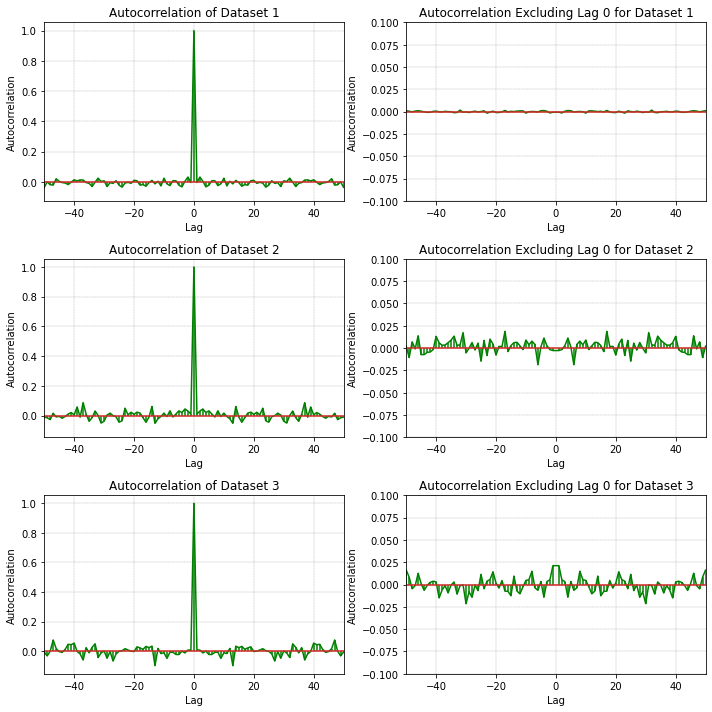

In [14]:
# Set up the figure and axes for a 4x2 grid of plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
datasets = ['pseudo_random_50kHz_seqlen_8191_1.csv', 'pseudo_random_50kHz_seqlen_262143_1.csv', 'pseudo_random_50kHz_seqlen_1048575_1.csv']  # Replace with actual filenames

for i, dataset in enumerate(datasets):
    # Load data
    data_path = f"/Users/goldenswan/Desktop/Thesis/Data/HP/{dataset}"
    data = pd.read_csv(data_path, delimiter=';')
    data = data.rename(columns={'# TIME (us)': 'Time', 'CH1 (V)': 'Value'})
    
    # Sampling the data
    sample_rate = 10000  # For the first row
    data_sampled = data.iloc[::sample_rate]
    white_noise = data_sampled['Value']

    # Computing autocorrelation
    autocorr = np.correlate(white_noise, white_noise, mode='full')
    autocorr_normalized = autocorr / autocorr.max()
    lags = np.arange(-len(white_noise) + 1, len(white_noise))

    # Plotting the autocorrelation function including lag 0
    axes[i, 0].stem(lags, autocorr_normalized, use_line_collection=True, linefmt='green', markerfmt='green')
    axes[i, 0].set_xlim(-50, 50)
    axes[i, 0].set_title(f'Autocorrelation of Dataset {i+1}')
    axes[i, 0].set_xlabel('Lag')
    axes[i, 0].set_ylabel('Autocorrelation')
    axes[i, 0].grid(True, linestyle='--', linewidth=0.3, color='gray')

    # Now for the second column, excluding lag 0
    sample_rate = 1000  # For the second row
    data_sampled = data.iloc[::sample_rate]
    white_noise = data_sampled['Value']

    # Recompute autocorrelation for the second plot
    autocorr = np.correlate(white_noise, white_noise, mode='full')
    autocorr_normalized = autocorr / autocorr.max()
    lags = np.arange(-len(white_noise) + 1, len(white_noise))

    # Exclude the peak at lag 0 for visualization purposes
    non_zero_lags = lags != 0
    autocorr_no_peak = autocorr_normalized[non_zero_lags]
    lags_no_peak = lags[non_zero_lags]

    # Plotting the autocorrelation function excluding lag 0
    axes[i, 1].stem(lags_no_peak, autocorr_no_peak, use_line_collection=True, linefmt='green', markerfmt='green')
    axes[i, 1].set_xlim(-50, 50)
    axes[i, 1].set_ylim(-0.1, 0.1)
    axes[i, 1].set_title(f'Autocorrelation Excluding Lag 0 for Dataset {i+1}')
    axes[i, 1].set_xlabel('Lag')
    axes[i, 1].set_ylabel('Autocorrelation')
    axes[i, 1].grid(True, linestyle='--', linewidth=0.3, color='gray')

plt.tight_layout()

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/AutoCorr/AutoCorr_HP_PRNG.png')

plt.show()


# 3. Autocorrelation of Wandel and Goltermann RG-1

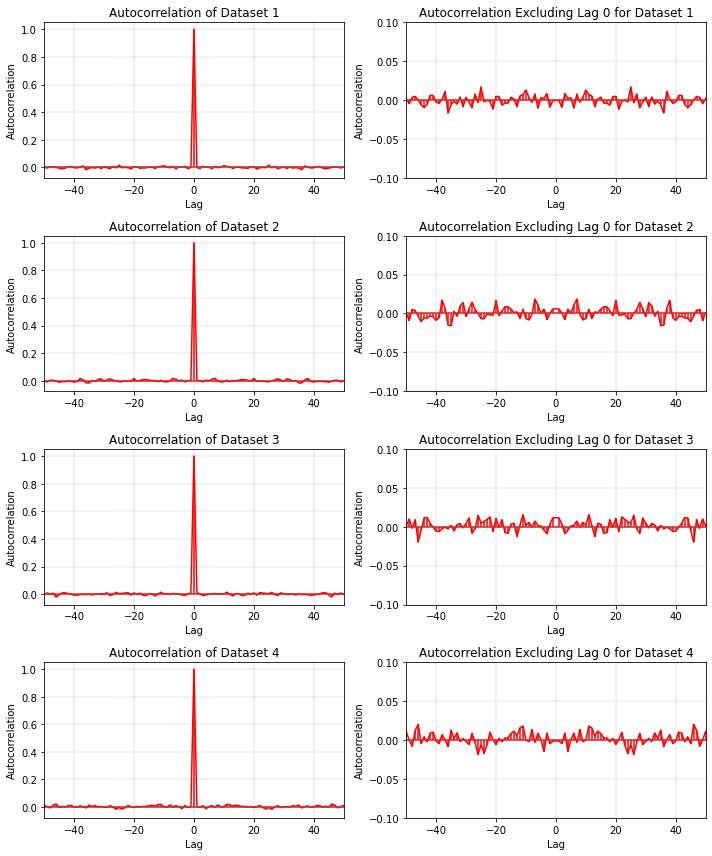

In [15]:
# Set up the figure and axes for a 4x2 grid of plots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
datasets = ['white_noise_16Hz_22kHz_1.csv', 'white_noise_16Hz_22kHz_2.csv', 'white_noise_16Hz_22kHz_3.csv', 'white_noise_16Hz_22kHz_4.csv']  # Replace with actual filenames

for i, dataset in enumerate(datasets):
    # Load data
    data_path = f"/Users/goldenswan/Desktop/Thesis/Data/WG/{dataset}"
    data = pd.read_csv(data_path, delimiter=';')
    data = data.rename(columns={'# TIME (us)': 'Time', 'CH1 (V)': 'Value'})
    
    # Sampling the data
    sample_rate = 500  # For the first row
    data_sampled = data.iloc[::sample_rate]
    white_noise = data_sampled['Value']

    # Computing autocorrelation
    autocorr = np.correlate(white_noise, white_noise, mode='full')
    autocorr_normalized = autocorr / autocorr.max()
    lags = np.arange(-len(white_noise) + 1, len(white_noise))

    # Plotting the autocorrelation function including lag 0
    axes[i, 0].stem(lags, autocorr_normalized, use_line_collection=True, linefmt='red', markerfmt='red')
    axes[i, 0].set_xlim(-50, 50)
    axes[i, 0].set_title(f'Autocorrelation of Dataset {i+1}')
    axes[i, 0].set_xlabel('Lag')
    axes[i, 0].set_ylabel('Autocorrelation')
    axes[i, 0].grid(True, linestyle='--', linewidth=0.3, color='gray')

    # Now for the second column, excluding lag 0
    sample_rate = 500  # For the second row
    data_sampled = data.iloc[::sample_rate]
    white_noise = data_sampled['Value']

    # Recompute autocorrelation for the second plot
    autocorr = np.correlate(white_noise, white_noise, mode='full')
    autocorr_normalized = autocorr / autocorr.max()
    lags = np.arange(-len(white_noise) + 1, len(white_noise))

    # Exclude the peak at lag 0 for visualization purposes
    non_zero_lags = lags != 0
    autocorr_no_peak = autocorr_normalized[non_zero_lags]
    lags_no_peak = lags[non_zero_lags]

    # Plotting the autocorrelation function excluding lag 0
    axes[i, 1].stem(lags_no_peak, autocorr_no_peak, use_line_collection=True, linefmt='red', markerfmt='red')
    axes[i, 1].set_xlim(-50, 50)
    axes[i, 1].set_ylim(-0.1, 0.1)
    axes[i, 1].set_title(f'Autocorrelation Excluding Lag 0 for Dataset {i+1}')
    axes[i, 1].set_xlabel('Lag')
    axes[i, 1].set_ylabel('Autocorrelation')
    axes[i, 1].grid(True, linestyle='--', linewidth=0.3, color='gray')

plt.tight_layout()

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/AutoCorr/AutoCorr_WG_16.png')

plt.show()


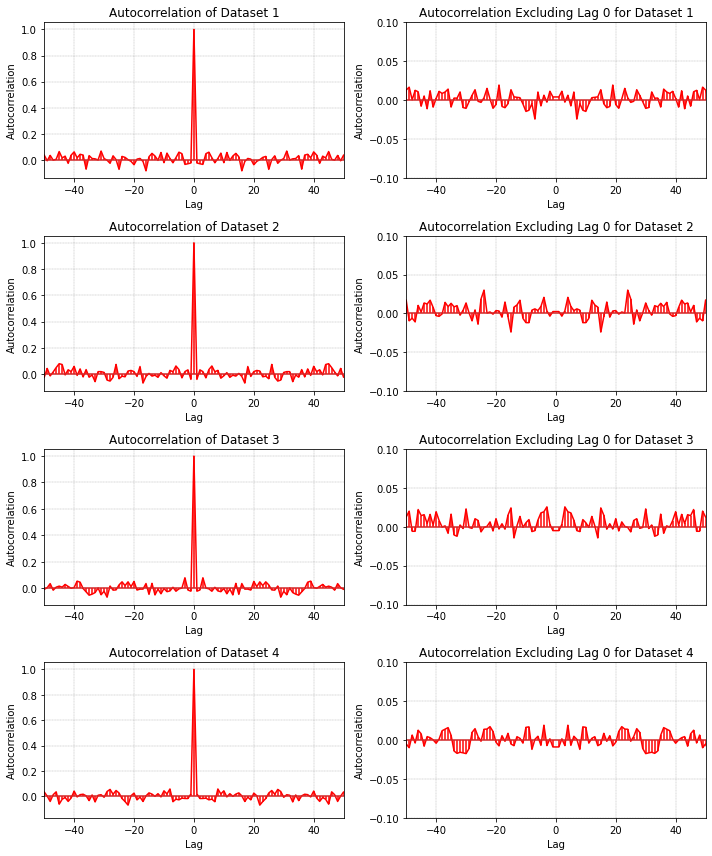

In [16]:
# Set up the figure and axes for a 4x2 grid of plots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
datasets = ['white_noise_100kHz_1.csv', 'white_noise_100kHz_2.csv', 'white_noise_100kHz_3.csv', 'white_noise_100kHz_4.csv']  # Replace with actual filenames

for i, dataset in enumerate(datasets):
    # Load data
    data_path = f"/Users/goldenswan/Desktop/Thesis/Data/WG/{dataset}"
    data = pd.read_csv(data_path, delimiter=';')
    data = data.rename(columns={'# TIME (us)': 'Time', 'CH1 (V)': 'Value'})
    
    # Sampling the data
    sample_rate = 10000  # For the first row
    data_sampled = data.iloc[::sample_rate]
    white_noise = data_sampled['Value']

    # Computing autocorrelation
    autocorr = np.correlate(white_noise, white_noise, mode='full')
    autocorr_normalized = autocorr / autocorr.max()
    lags = np.arange(-len(white_noise) + 1, len(white_noise))

    # Plotting the autocorrelation function including lag 0
    axes[i, 0].stem(lags, autocorr_normalized, use_line_collection=True, linefmt='red', markerfmt='red')
    axes[i, 0].set_xlim(-50, 50)
    axes[i, 0].set_title(f'Autocorrelation of Dataset {i+1}')
    axes[i, 0].set_xlabel('Lag')
    axes[i, 0].set_ylabel('Autocorrelation')
    axes[i, 0].grid(True, linestyle='--', linewidth=0.3, color='gray')

    # Now for the second column, excluding lag 0
    sample_rate = 1000  # For the second row
    data_sampled = data.iloc[::sample_rate]
    white_noise = data_sampled['Value']

    # Recompute autocorrelation for the second plot
    autocorr = np.correlate(white_noise, white_noise, mode='full')
    autocorr_normalized = autocorr / autocorr.max()
    lags = np.arange(-len(white_noise) + 1, len(white_noise))

    # Exclude the peak at lag 0 for visualization purposes
    non_zero_lags = lags != 0
    autocorr_no_peak = autocorr_normalized[non_zero_lags]
    lags_no_peak = lags[non_zero_lags]

    # Plotting the autocorrelation function excluding lag 0
    axes[i, 1].stem(lags_no_peak, autocorr_no_peak, use_line_collection=True, linefmt='red', markerfmt='red')
    axes[i, 1].set_xlim(-50, 50)
    axes[i, 1].set_ylim(-0.1, 0.1)
    axes[i, 1].set_title(f'Autocorrelation Excluding Lag 0 for Dataset {i+1}')
    axes[i, 1].set_xlabel('Lag')
    axes[i, 1].set_ylabel('Autocorrelation')
    axes[i, 1].grid(True, linestyle='--', linewidth=0.3, color='gray')

plt.tight_layout()

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/AutoCorr/AutoCorr_WG_100.png')

plt.show()


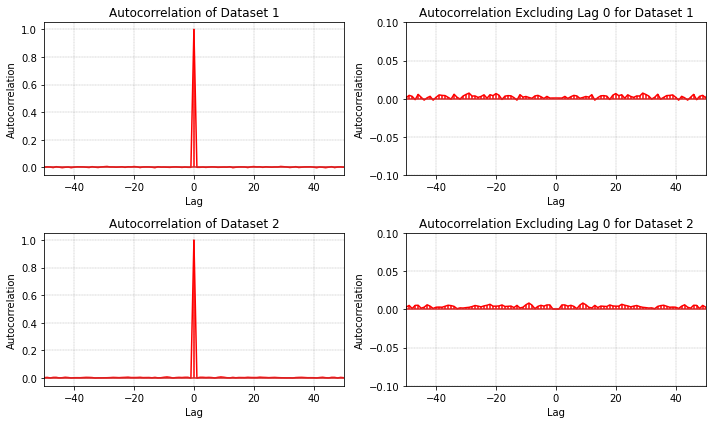

In [17]:
# Set up the figure and axes for a 4x2 grid of plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
datasets = ['0000.csv', '0001.csv']  # Replace with actual filenames

for i, dataset in enumerate(datasets):
    # Load data
    data_path = f"/Users/goldenswan/Desktop/Thesis/Data/WG_10bit/{dataset}"
    data = pd.read_csv(data_path, delimiter=';')
    data = data.rename(columns={'# TIME (ns)': 'Time', 'CH1 (V)': 'Value'})
    
    # Sampling the data
    sample_rate = 500  # For the first row
    data_sampled = data.iloc[::sample_rate]
    white_noise = data_sampled['Value']

    # Computing autocorrelation
    autocorr = np.correlate(white_noise, white_noise, mode='full')
    autocorr_normalized = autocorr / autocorr.max()
    lags = np.arange(-len(white_noise) + 1, len(white_noise))

    # Plotting the autocorrelation function including lag 0
    axes[i, 0].stem(lags, autocorr_normalized, use_line_collection=True, linefmt='red', markerfmt='red')
    axes[i, 0].set_xlim(-50, 50)
    axes[i, 0].set_title(f'Autocorrelation of Dataset {i+1}')
    axes[i, 0].set_xlabel('Lag')
    axes[i, 0].set_ylabel('Autocorrelation')
    axes[i, 0].grid(True, linestyle='--', linewidth=0.3, color='gray')

    # Now for the second column, excluding lag 0
    sample_rate = 500  # For the second row
    data_sampled = data.iloc[::sample_rate]
    white_noise = data_sampled['Value']

    # Recompute autocorrelation for the second plot
    autocorr = np.correlate(white_noise, white_noise, mode='full')
    autocorr_normalized = autocorr / autocorr.max()
    lags = np.arange(-len(white_noise) + 1, len(white_noise))

    # Exclude the peak at lag 0 for visualization purposes
    non_zero_lags = lags != 0
    autocorr_no_peak = autocorr_normalized[non_zero_lags]
    lags_no_peak = lags[non_zero_lags]

    # Plotting the autocorrelation function excluding lag 0
    axes[i, 1].stem(lags_no_peak, autocorr_no_peak, use_line_collection=True, linefmt='red', markerfmt='red')
    axes[i, 1].set_xlim(-50, 50)
    axes[i, 1].set_ylim(-0.1, 0.1)
    axes[i, 1].set_title(f'Autocorrelation Excluding Lag 0 for Dataset {i+1}')
    axes[i, 1].set_xlabel('Lag')
    axes[i, 1].set_ylabel('Autocorrelation')
    axes[i, 1].grid(True, linestyle='--', linewidth=0.3, color='gray')

plt.tight_layout()

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/AutoCorr/AutoCorr_WG_10bit.png')

plt.show()


# Autocorrelation of Zener diode based NG

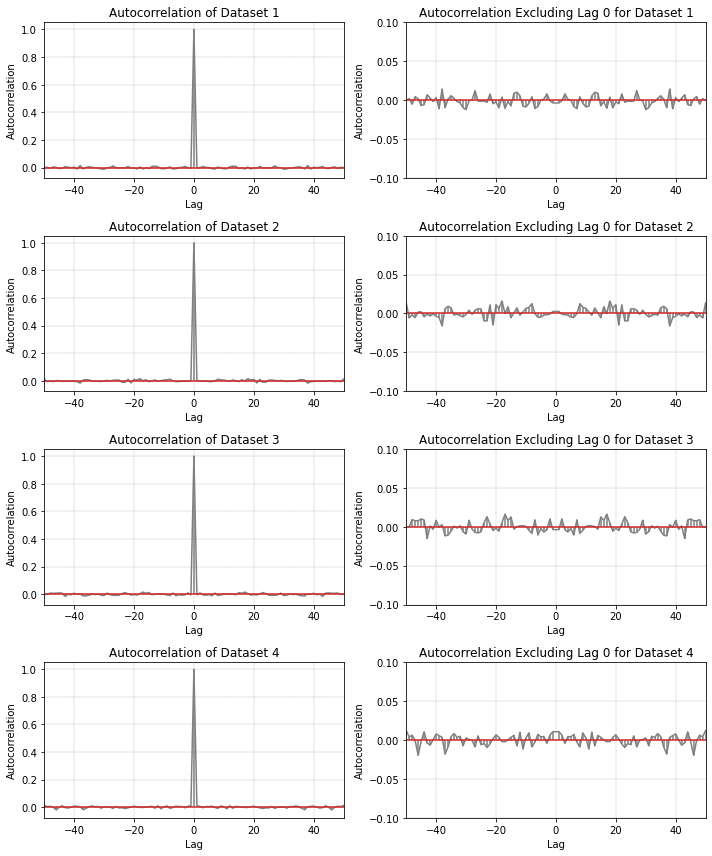

In [18]:
# Set up the figure and axes for a 4x2 grid of plots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
datasets = ['1.csv', '2.csv', '3.csv', '4.csv']  # Replace with actual filenames

for i, dataset in enumerate(datasets):
    # Load data
    data_path = f"/Users/goldenswan/Desktop/Thesis/Data/Z1_100kHz_lowpassfilter/{dataset}"
    data = pd.read_csv(data_path, delimiter=';')
    data = data.rename(columns={'# TIME (us)': 'Time', 'CH1 (V)': 'Value'})
    
    # Sampling the data
    sample_rate = 500  # For the first row
    data_sampled = data.iloc[::sample_rate]
    white_noise = data_sampled['Value']

    # Computing autocorrelation
    autocorr = np.correlate(white_noise, white_noise, mode='full')
    autocorr_normalized = autocorr / autocorr.max()
    lags = np.arange(-len(white_noise) + 1, len(white_noise))

    # Plotting the autocorrelation function including lag 0
    axes[i, 0].stem(lags, autocorr_normalized, use_line_collection=True, linefmt='grey', markerfmt='grey')
    axes[i, 0].set_xlim(-50, 50)
    axes[i, 0].set_title(f'Autocorrelation of Dataset {i+1}')
    axes[i, 0].set_xlabel('Lag')
    axes[i, 0].set_ylabel('Autocorrelation')
    axes[i, 0].grid(True, linestyle='--', linewidth=0.3, color='gray')

    # Now for the second column, excluding lag 0
    sample_rate = 500  # For the second row
    data_sampled = data.iloc[::sample_rate]
    white_noise = data_sampled['Value']

    # Recompute autocorrelation for the second plot
    autocorr = np.correlate(white_noise, white_noise, mode='full')
    autocorr_normalized = autocorr / autocorr.max()
    lags = np.arange(-len(white_noise) + 1, len(white_noise))

    # Exclude the peak at lag 0 for visualization purposes
    non_zero_lags = lags != 0
    autocorr_no_peak = autocorr_normalized[non_zero_lags]
    lags_no_peak = lags[non_zero_lags]

    # Plotting the autocorrelation function excluding lag 0
    axes[i, 1].stem(lags_no_peak, autocorr_no_peak, use_line_collection=True, linefmt='grey', markerfmt='grey')
    axes[i, 1].set_xlim(-50, 50)
    axes[i, 1].set_ylim(-0.1, 0.1)
    axes[i, 1].set_title(f'Autocorrelation Excluding Lag 0 for Dataset {i+1}')
    axes[i, 1].set_xlabel('Lag')
    axes[i, 1].set_ylabel('Autocorrelation')
    axes[i, 1].grid(True, linestyle='--', linewidth=0.3, color='gray')

plt.tight_layout()

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/AutoCorr/AutoCorr_Z1_lp.png')

plt.show()


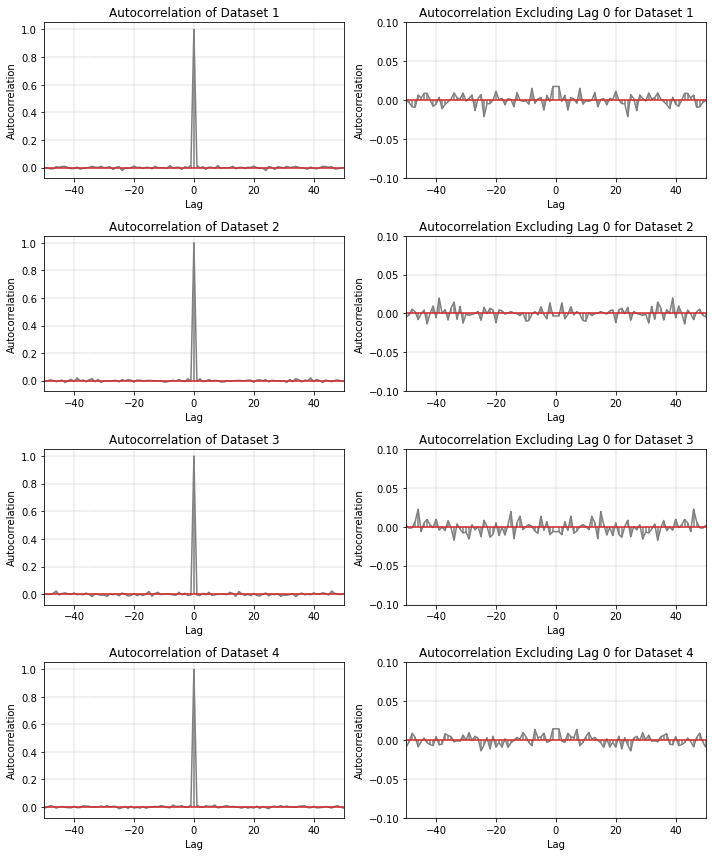

In [19]:
# Set up the figure and axes for a 4x2 grid of plots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
datasets = ['1.csv', '2.csv', '3.csv', '4.csv']  # Replace with actual filenames

for i, dataset in enumerate(datasets):
    # Load data
    data_path = f"/Users/goldenswan/Desktop/Thesis/Data/Z1_no_lowpassfilter/{dataset}"
    data = pd.read_csv(data_path, delimiter=';')
    data = data.rename(columns={'# TIME (us)': 'Time', 'CH1 (V)': 'Value'})
    
    # Sampling the data
    sample_rate = 500  # For the first row
    data_sampled = data.iloc[::sample_rate]
    white_noise = data_sampled['Value']

    # Computing autocorrelation
    autocorr = np.correlate(white_noise, white_noise, mode='full')
    autocorr_normalized = autocorr / autocorr.max()
    lags = np.arange(-len(white_noise) + 1, len(white_noise))

    # Plotting the autocorrelation function including lag 0
    axes[i, 0].stem(lags, autocorr_normalized, use_line_collection=True, linefmt='grey', markerfmt='grey')
    axes[i, 0].set_xlim(-50, 50)
    axes[i, 0].set_title(f'Autocorrelation of Dataset {i+1}')
    axes[i, 0].set_xlabel('Lag')
    axes[i, 0].set_ylabel('Autocorrelation')
    axes[i, 0].grid(True, linestyle='--', linewidth=0.3, color='gray')

    # Now for the second column, excluding lag 0
    sample_rate = 500  # For the second row
    data_sampled = data.iloc[::sample_rate]
    white_noise = data_sampled['Value']

    # Recompute autocorrelation for the second plot
    autocorr = np.correlate(white_noise, white_noise, mode='full')
    autocorr_normalized = autocorr / autocorr.max()
    lags = np.arange(-len(white_noise) + 1, len(white_noise))

    # Exclude the peak at lag 0 for visualization purposes
    non_zero_lags = lags != 0
    autocorr_no_peak = autocorr_normalized[non_zero_lags]
    lags_no_peak = lags[non_zero_lags]

    # Plotting the autocorrelation function excluding lag 0
    axes[i, 1].stem(lags_no_peak, autocorr_no_peak, use_line_collection=True, linefmt='grey', markerfmt='grey')
    axes[i, 1].set_xlim(-50, 50)
    axes[i, 1].set_ylim(-0.1, 0.1)
    axes[i, 1].set_title(f'Autocorrelation Excluding Lag 0 for Dataset {i+1}')
    axes[i, 1].set_xlabel('Lag')
    axes[i, 1].set_ylabel('Autocorrelation')
    axes[i, 1].grid(True, linestyle='--', linewidth=0.3, color='gray')

plt.tight_layout()

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/AutoCorr/AutoCorr_Z1_no_lp.png')

plt.show()


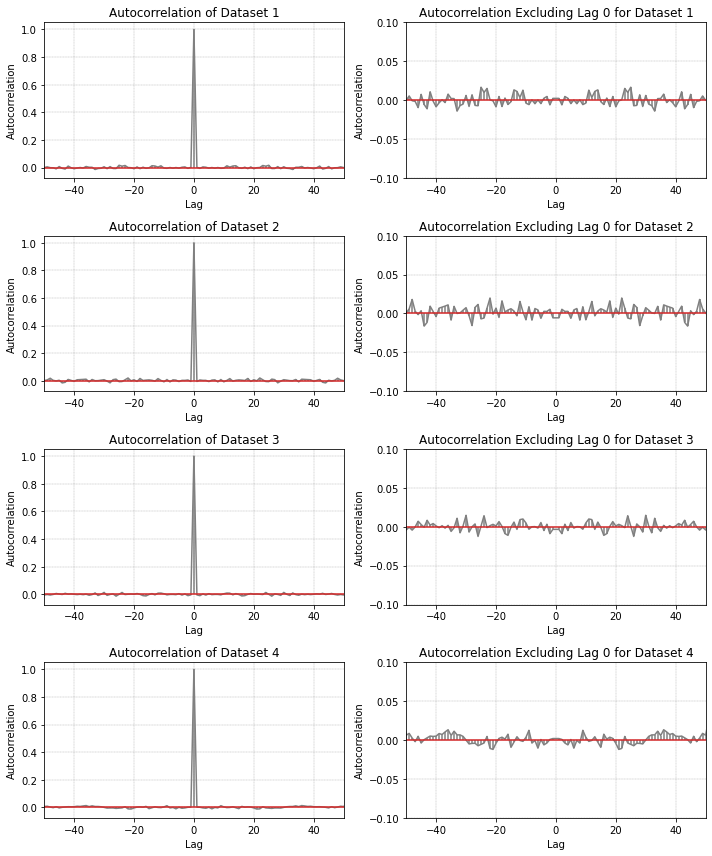

In [20]:
# Set up the figure and axes for a 4x2 grid of plots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
datasets = ['1.csv', '2.csv', '3.csv', '4.csv']  # Replace with actual filenames

for i, dataset in enumerate(datasets):
    # Load data
    data_path = f"/Users/goldenswan/Desktop/Thesis/Data/Z2_100kHz_lowpassfilter/{dataset}"
    data = pd.read_csv(data_path, delimiter=';')
    data = data.rename(columns={'# TIME (us)': 'Time', 'CH1 (V)': 'Value'})
    
    # Sampling the data
    sample_rate = 500  # For the first row
    data_sampled = data.iloc[::sample_rate]
    white_noise = data_sampled['Value']

    # Computing autocorrelation
    autocorr = np.correlate(white_noise, white_noise, mode='full')
    autocorr_normalized = autocorr / autocorr.max()
    lags = np.arange(-len(white_noise) + 1, len(white_noise))

    # Plotting the autocorrelation function including lag 0
    axes[i, 0].stem(lags, autocorr_normalized, use_line_collection=True, linefmt='grey', markerfmt='grey')
    axes[i, 0].set_xlim(-50, 50)
    axes[i, 0].set_title(f'Autocorrelation of Dataset {i+1}')
    axes[i, 0].set_xlabel('Lag')
    axes[i, 0].set_ylabel('Autocorrelation')
    axes[i, 0].grid(True, linestyle='--', linewidth=0.3, color='gray')

    # Now for the second column, excluding lag 0
    sample_rate = 500  # For the second row
    data_sampled = data.iloc[::sample_rate]
    white_noise = data_sampled['Value']

    # Recompute autocorrelation for the second plot
    autocorr = np.correlate(white_noise, white_noise, mode='full')
    autocorr_normalized = autocorr / autocorr.max()
    lags = np.arange(-len(white_noise) + 1, len(white_noise))

    # Exclude the peak at lag 0 for visualization purposes
    non_zero_lags = lags != 0
    autocorr_no_peak = autocorr_normalized[non_zero_lags]
    lags_no_peak = lags[non_zero_lags]

    # Plotting the autocorrelation function excluding lag 0
    axes[i, 1].stem(lags_no_peak, autocorr_no_peak, use_line_collection=True, linefmt='grey', markerfmt='grey')
    axes[i, 1].set_xlim(-50, 50)
    axes[i, 1].set_ylim(-0.1, 0.1)
    axes[i, 1].set_title(f'Autocorrelation Excluding Lag 0 for Dataset {i+1}')
    axes[i, 1].set_xlabel('Lag')
    axes[i, 1].set_ylabel('Autocorrelation')
    axes[i, 1].grid(True, linestyle='--', linewidth=0.3, color='gray')

plt.tight_layout()

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/AutoCorr/AutoCorr_Z2_lp.png')

plt.show()


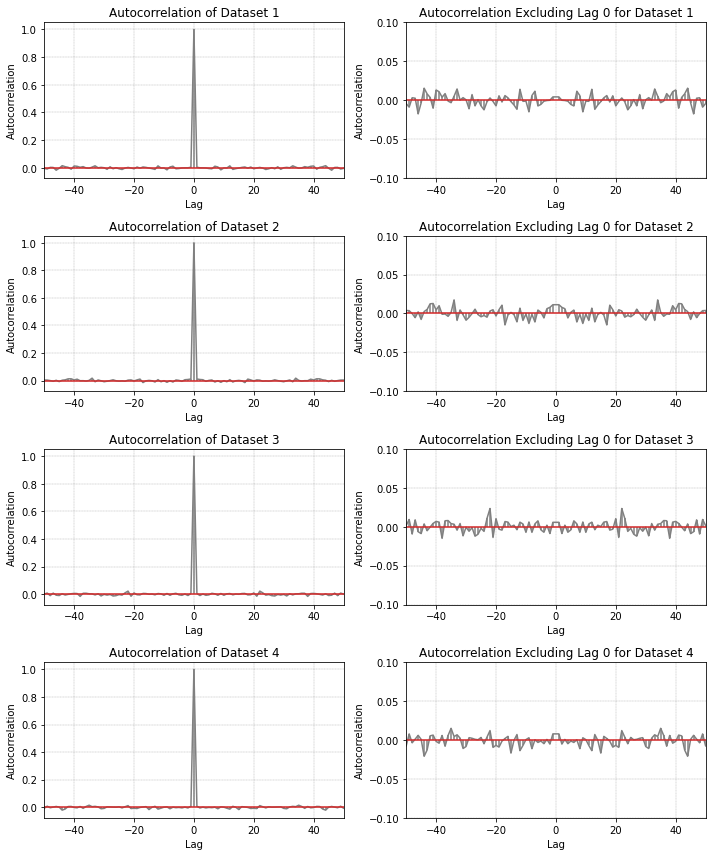

In [21]:
# Set up the figure and axes for a 4x2 grid of plots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
datasets = ['1.csv', '2.csv', '3.csv', '4.csv']  # Replace with actual filenames

for i, dataset in enumerate(datasets):
    # Load data
    data_path = f"/Users/goldenswan/Desktop/Thesis/Data/Z2_no_lowpassfilter/{dataset}"
    data = pd.read_csv(data_path, delimiter=';')
    data = data.rename(columns={'# TIME (us)': 'Time', 'CH1 (V)': 'Value'})
    
    # Sampling the data
    sample_rate = 500  # For the first row
    data_sampled = data.iloc[::sample_rate]
    white_noise = data_sampled['Value']

    # Computing autocorrelation
    autocorr = np.correlate(white_noise, white_noise, mode='full')
    autocorr_normalized = autocorr / autocorr.max()
    lags = np.arange(-len(white_noise) + 1, len(white_noise))

    # Plotting the autocorrelation function including lag 0
    axes[i, 0].stem(lags, autocorr_normalized, use_line_collection=True, linefmt='grey', markerfmt='grey')
    axes[i, 0].set_xlim(-50, 50)
    axes[i, 0].set_title(f'Autocorrelation of Dataset {i+1}')
    axes[i, 0].set_xlabel('Lag')
    axes[i, 0].set_ylabel('Autocorrelation')
    axes[i, 0].grid(True, linestyle='--', linewidth=0.3, color='gray')

    # Now for the second column, excluding lag 0
    sample_rate = 500  # For the second row
    data_sampled = data.iloc[::sample_rate]
    white_noise = data_sampled['Value']

    # Recompute autocorrelation for the second plot
    autocorr = np.correlate(white_noise, white_noise, mode='full')
    autocorr_normalized = autocorr / autocorr.max()
    lags = np.arange(-len(white_noise) + 1, len(white_noise))

    # Exclude the peak at lag 0 for visualization purposes
    non_zero_lags = lags != 0
    autocorr_no_peak = autocorr_normalized[non_zero_lags]
    lags_no_peak = lags[non_zero_lags]

    # Plotting the autocorrelation function excluding lag 0
    axes[i, 1].stem(lags_no_peak, autocorr_no_peak, use_line_collection=True, linefmt='grey', markerfmt='grey')
    axes[i, 1].set_xlim(-50, 50)
    axes[i, 1].set_ylim(-0.1, 0.1)
    axes[i, 1].set_title(f'Autocorrelation Excluding Lag 0 for Dataset {i+1}')
    axes[i, 1].set_xlabel('Lag')
    axes[i, 1].set_ylabel('Autocorrelation')
    axes[i, 1].grid(True, linestyle='--', linewidth=0.3, color='gray')

plt.tight_layout()

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/AutoCorr/AutoCorr_Z2_no_lp.png')

plt.show()
